<a href="https://colab.research.google.com/github/woodstone10/machine_learning_study-python/blob/main/ML_DeepLearning_Predict_Income_Adult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###########################################################################################
#
# ML_DeepLearning_Predict_Income_Adult.py
#
# Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.
# UCI data set name: Adult (https://archive.ics.uci.edu/ml/machine-learning-databases/adult/)
#
# Created by Jonggil Nam
# LinkedIn: https://www.linkedin.com/in/jonggil-nam-6099a162/
# Github: https://github.com/woodstone10
# e-mail: woodstone10@gmail.com
# phone: +82-10-8709-6299
###########################################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.metrics
import sklearn.linear_model
import sklearn.ensemble
import sklearn.neural_network
import sklearn.naive_bayes
import sklearn.tree
import sklearn.svm

In [5]:
# Data set from UCI Machine Learning Repository
#  - https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
# Listing of attributes:
# 1. age: continuous.
# 2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov,
#       State-gov, Without-pay, Never-worked.
# 3. fnlwgt: continuous.
# 4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc,
#       9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
# 5. education-num: continuous.
# 6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed,
#       Married-spouse-absent, Married-AF-spouse.
# 7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial,
#       Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving,
#       Priv-house-serv, Protective-serv, Armed-Forces.
# 8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
# 9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
# 10. sex: Female, Male.
# 11. capital-gain: continuous.
# 12. capital-loss: continuous.
# 13. hours-per-week: continuous.
# 14. native-country: United-States, Cambodia, England, Puerto-Rico,
#       Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras,
#       Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic,
#       Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia,
#       El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

# dataset from github (UCI)
#a = pd.read_csv('https://raw.githubusercontent.com/woodstone10/dataset/main/adult.data', error_bad_lines=False)
a = pd.read_csv('https://raw.githubusercontent.com/woodstone10/dataset/main/adult.data', sep= ',', header= None,skiprows=1)
b = pd.read_csv('https://raw.githubusercontent.com/woodstone10/dataset/main/adult.test', sep= ',', header= None,skiprows=1)
df = pd.concat([a, b])
print(df.head())

   0                  1       2           3   ...  11  12              13      14
0  50   Self-emp-not-inc   83311   Bachelors  ...   0  13   United-States   <=50K
1  38            Private  215646     HS-grad  ...   0  40   United-States   <=50K
2  53            Private  234721        11th  ...   0  40   United-States   <=50K
3  28            Private  338409   Bachelors  ...   0  40            Cuba   <=50K
4  37            Private  284582     Masters  ...   0  40   United-States   <=50K

[5 rows x 15 columns]


In [6]:
data = df
data.replace({
    ' <=50K':0,
    ' <=50K.':0,
    ' >50K':1,
    ' >50K.':1,
},inplace=True)
print(data.head())


   0                  1       2           3   ...  11  12              13 14
0  50   Self-emp-not-inc   83311   Bachelors  ...   0  13   United-States  0
1  38            Private  215646     HS-grad  ...   0  40   United-States  0
2  53            Private  234721        11th  ...   0  40   United-States  0
3  28            Private  338409   Bachelors  ...   0  40            Cuba  0
4  37            Private  284582     Masters  ...   0  40   United-States  0

[5 rows x 15 columns]


In [7]:
# encoding using sklearn LabelEncoder (string to numeric)
transform_needed = [False, True, False, True, False, True, True, True, True, True, False, False, False, True, False]
encoded_data = np.zeros(shape=(data.shape[0], data.shape[1]), dtype=np.int)
for i in range(len(transform_needed)):
    if transform_needed[i]:
        tmp_data = data.iloc[:, i].tolist()
        encoder = sklearn.preprocessing.LabelEncoder()
        encoder.fit(tmp_data)
        encoded_data[:, i] = encoder.transform(tmp_data)
    else:
        encoded_data[:, i] = data.iloc[:, i].tolist()
print(encoded_data)


[[    50      6  83311 ...     13     39      0]
 [    38      4 215646 ...     40     39      0]
 [    53      4 234721 ...     40     39      0]
 ...
 [    38      4 374983 ...     50     39      0]
 [    44      4  83891 ...     40     39      0]
 [    35      5 182148 ...     60     39      1]]


In [8]:
# encoded data X and y
X = encoded_data[:,:14]
y = encoded_data[:,14]
print(X)

[[    50      6  83311 ...      0     13     39]
 [    38      4 215646 ...      0     40     39]
 [    53      4 234721 ...      0     40     39]
 ...
 [    38      4 374983 ...      0     50     39]
 [    44      4  83891 ...      0     40     39]
 [    35      5 182148 ...      0     60     39]]


In [9]:
# encoded data split into train 80%, test 20%
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
print("total data size:",X.shape, "train data size:",X_train.shape, "test data size:",X_test.shape)


total data size: (48841, 14) train data size: (39072, 14) test data size: (9769, 14)


Epoch 1/50
855/855 [==============================] - 2s 2ms/step - loss: 1254.7805 - accuracy: 0.6377 - val_loss: 0.5822 - val_accuracy: 0.7670
Epoch 2/50
855/855 [==============================] - 2s 2ms/step - loss: 24.4966 - accuracy: 0.7241 - val_loss: 0.5541 - val_accuracy: 0.7670
Epoch 3/50
855/855 [==============================] - 2s 2ms/step - loss: 6.6491 - accuracy: 0.7298 - val_loss: 0.5456 - val_accuracy: 0.7670
Epoch 4/50
855/855 [==============================] - 2s 2ms/step - loss: 2.9443 - accuracy: 0.7477 - val_loss: 0.5437 - val_accuracy: 0.7670
Epoch 5/50
855/855 [==============================] - 2s 2ms/step - loss: 1.7498 - accuracy: 0.7446 - val_loss: 0.5432 - val_accuracy: 0.7670
Epoch 6/50
855/855 [==============================] - 2s 2ms/step - loss: 1.0309 - accuracy: 0.7489 - val_loss: 0.5431 - val_accuracy: 0.7670
Epoch 7/50
855/855 [==============================] - 2s 2ms/step - loss: 0.9369 - accuracy: 0.7521 - val_loss: 0.5431 - val_accuracy: 0.7670
Ep

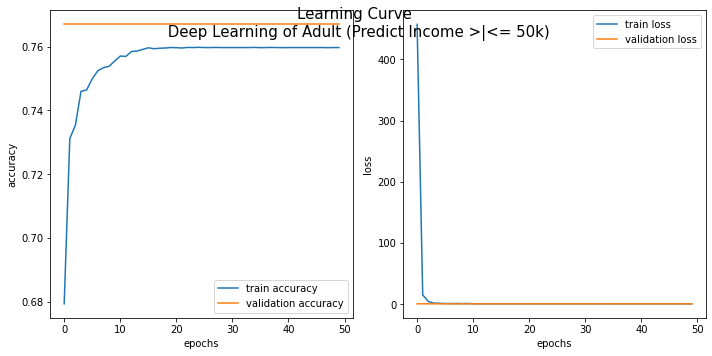

306/306 [==============================] - 0s 1ms/step - loss: 0.5559 - accuracy: 0.7559
------------------------------
Test Accuracy
------------------------------
Deep Learning with Neural Network: 0.7558603882789612


In [11]:
# ------------------------------------------------------------------
# Model. Artificial Neural Network Deep Learning using Keras high-level API
# ------------------------------------------------------------------
model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_shape=X_train[1].shape, activation='relu'),
        tf.keras.layers.Dropout(0.3), # for reduce overfitting
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dropout(0.3), # for reduce overfitting
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dropout(0.3), # for reduce overfitting
        tf.keras.layers.Dense(1, activation='sigmoid') # output is 1 or o, so sigmoid function is used
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
    loss=tf.keras.losses.binary_crossentropy, # prediction is 1 or 0, so binary_crossentropy is selected.
    metrics=['accuracy']
)

train = model.fit(X_train, y_train,
                    validation_split=0.3, # train data split into train 70%, validation 30%
                    epochs=50,
                    verbose=1 # online display with progressbar
                    )

# Learning curve (loss and accuracy)
train_acc = train.history['accuracy']
train_loss = train.history['loss']
val_acc = train.history['val_accuracy']
val_loss = train.history['val_loss']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(np.arange((len(train_acc))), train_acc, label='train accuracy')
plt.plot(np.arange((len(val_acc))), val_acc, label='validation accuracy')
plt.legend(loc='best')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.subplot(1, 2, 2)
plt.plot(np.arange((len(train_loss))), train_loss, label='train loss')
plt.plot(np.arange((len(val_loss))), val_loss, label='validation loss')
plt.legend(loc='best')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.suptitle('Learning Curve \n Deep Learning of Adult (Predict Income >|<= 50k)', fontsize=15)
plt.tight_layout()
plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test)
print("-"*30)
print("Test Accuracy")
print("-"*30)
print("Deep Learning with Neural Network:", test_acc)

In [12]:
# ------------------------------------------------------------------
# Appendix. Comparison to other algorithms using Scikit-Learn
# refer to https://www.kaggle.com/overload10/income-prediction-on-uci-adult-dataset
# ------------------------------------------------------------------
# Model. Logistic Regression
model = sklearn.linear_model.LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_acc = sklearn.metrics.accuracy_score(y_test, y_pred)
print("Logistic Regression:",test_acc)

# Model. Random Forest
model = sklearn.ensemble.RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_acc = sklearn.metrics.accuracy_score(y_test, y_pred)
print("Random Forest:",test_acc)

# Model. Neural Network
model = sklearn.neural_network.MLPClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_acc = sklearn.metrics.accuracy_score(y_test, y_pred)
print("Neural Network:",test_acc)

# Model. Naive Bayes
model = sklearn.naive_bayes.GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_acc = sklearn.metrics.accuracy_score(y_test, y_pred)
print("Gaussian NB:",test_acc)

# Model. Decision Tree
model = sklearn.tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_acc = sklearn.metrics.accuracy_score(y_test, y_pred)
print("Decision Tree Classifier:",test_acc)

# Model. SVM
model = sklearn.svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_acc = sklearn.metrics.accuracy_score(y_test, y_pred)
print("SVM:",test_acc)


Logistic Regression: 0.7863650322448562
Random Forest: 0.8550516941345071


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neural Network: 0.7988535162247927
Gaussian NB: 0.7940423789538336
Decision Tree Classifier: 0.8106254478452247
SVM: 0.7925069096120381
